This script tests add_noise.ipynb

It runs some examples to make sure that the script is working correctly.

In [60]:
import numpy as np
import eagle_constants_and_units as c
import cosmo_utils as csu
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import mpl_toolkits.axes_grid1 as axgrid
from astropy import constants as const
from astropy import units as u

import get_halpha_SB

%matplotlib inline

%run 'load_data.ipynb'
%run 'add_noise.ipynb'

### Make mock data set

To demonstrate the dependence of the different noise sources on time, I need a mock data set that I will add noise to.
How about not even using the EAGLE data at first, instead just using a circle of ones on a background of zeros (to make everything very clear!).

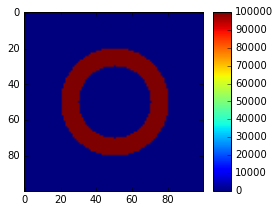

In [51]:
size = 100
pretenddata = np.zeros((size,size))
for j in np.arange(size)-size/2:
    for i in np.arange(size)-size/2:
        if np.sqrt(j**2 + i**2) < 30. and np.sqrt(j**2 + i**2) > 20. :  
            pretenddata[j+size/2,i+size/2] = 100000.
    
def plotdata(pretenddata,ax=None,bounds=None):
    oneplot=False
    if ax is None:
        fig = plt.figure(figsize=(6, 3.2))
        ax = fig.add_subplot(111)
        oneplot=True
        ax.set_title('Pretend Data')
    if bounds is None:
        img = ax.imshow(pretenddata)
    else:
        img = ax.imshow(pretenddata,vmin=bounds[0],vmax=bounds[1])
    #plt.imshow(pretenddata)
    ax.set_aspect('equal')
    div = axgrid.make_axes_locatable(ax)
    cax = div.append_axes("right",size="10%",pad=0.15)
    #cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
    #cax.get_xaxis().set_visible(False)
    #cax.get_yaxis().set_visible(False)
    #cax.patch.set_alpha(0)
    #cax.set_frame_on(False)
    #if fixscale:
    cbar = plt.colorbar(img,cax=cax,orientation='vertical')#,boundaries=np.linspace(0,90000))
    cbar.ax.tick_params()
    if oneplot:
        plt.show()

fig, (ax1) = plt.subplots(1, 1, figsize=(4, 4))
plotdata(pretenddata,ax=ax1)
plt.tight_layout()

This will be a handy plotting function for looking at the R and B_sky values.

In [52]:
def plthist(ax3,B_sky,R_squared,R,title='',label1='',label2='',label3='',ylim=[0,8500],xlim=[-1500,2000]):
    ax3.hist(np.ravel(B_sky),edgecolor='black', alpha = 0.5,label=label1)
    #ax3.hist(np.ravel(R_squared),edgecolor='black', alpha = 0.5,label=label2)
    ax3.hist(np.ravel(R),edgecolor='black', alpha = 0.5, label=label3)
    ax3.text(0.6,0.7,r'$\sigma$_sb = %.1f'%(np.std(B_sky)),transform=ax3.transAxes)
    ax3.text(0.6,0.6,r'$\sigma$_r = %.1f'%(np.std(R_squared)),transform=ax3.transAxes)
    ax3.text(0.6,0.5,r'$\sigma$_r = %.1f'%(np.std(R)),transform=ax3.transAxes)
    ax3.set_ylim(ylim)
    ax3.set_xlim(xlim)
    ax3.set_title(title)

## Start adding noise to the mock data

### Example 1: No binning (resolution = 2.8), one exposure (expnum = 1), difference exposure times

The next step is to start adding noise i.e. integrate for a small amount of time.

The add_noise function takes a couple inputs along with the data:
1. resolution
2. exposure time
3. readout noise value (optional)
4. toggle to use CMOS detectors (optional)

Let's not use the CMOS detectors, and let's use the default read out noise for now.

Let's just say we are not binning at first, so the resolution is the same as the detector (2.8").

And finally, let's use various exposure times, starting with one minute (60 seconds) and going upwards by orders of magnitude from there.  Also added the 2000s exposure to compare with the read out noise, since that is when sky background noise catches up to readout noise (see plots below to illustrate this).

Let's just say there will be one exposure (expnum = 1), used to calculate the read out noise.  If we leave that empty, the addnoise function will assume hour long exposures.

In [61]:
debugging = True
data = pretenddata; resolution = 2.8; exptime = 60.
noiseadded_signal1,B_sky_array1,R_array1 = addnoise(data,resolution,log=False,exptime=exptime, expnum=1, debugging=True)
R_squared_array1 = R_array1**2

data = pretenddata; resolution = 2.8; exptime = 600.
noiseadded_signal2,B_sky_array2,R_array2 = addnoise(data,resolution,log=False,exptime=exptime, expnum=1, debugging=True)
R_squared_array2 = R_array2**2

data = pretenddata; resolution = 2.8; exptime = 2000.
noiseadded_signal22,B_sky_array22,R_array22 = addnoise(data,resolution,log=False,exptime=exptime, expnum=1, debugging=True)
R_squared_array22 = R_array22**2

data = pretenddata; resolution = 2.8; exptime = 6000.
noiseadded_signal3,B_sky_array3,R_array3 = addnoise(data,resolution,log=False,exptime=exptime, expnum=1, debugging=True)
R_squared_array3 = R_array3**2

DEBUGGING: the binpix_size (resolution) is 2.8
DEBUGGING: the pixel size (inherent) is 2.8
VERBOSE: Using old cameras... (QE = 0.48, R = 10.)
DEBUGGING: R is : 10.0
DEBUGGING: the number of pixels is 1.0
DEBUGGING: the shape of the input data is:
(100, 100)
DEBUGGING: the total object signal [electrons] detected ranges from: 0.0 to 3.47759968285
DEBUGGING: the shape of the detsignal is:
(100, 100)
Adding sky background noise and shot noise.
DEBUGGING: the background in the bandwidth is: 0.560633
DEBUGGING: the background signal, B_sky [ph/s (in a pixel)], is: 1.3824775167
DEBUGGING: the shape of B_sky_array is: 
(100, 100)
DEBUGGING: the mean total background signal, B_sky_total [electrons], is: 82.9486510018
DEBUGGING: the total background noisy signal [electrons] ranges from: -37.4894451359 to 32.0811503443
Adding read out noise to the signal.
DEBUGGING: The number of exposures is: 1
DEBUGGING: Drawing 48.0 values (numpixel=1 * numexp=1.0 * numlens=48) per binned pixel and summing th

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:31: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


VERBOSE:  At line 90 out of 100
VERBOSE:  At line 91 out of 100
VERBOSE:  At line 92 out of 100
VERBOSE:  At line 93 out of 100
VERBOSE:  At line 94 out of 100
VERBOSE:  At line 95 out of 100
VERBOSE:  At line 96 out of 100
VERBOSE:  At line 97 out of 100
VERBOSE:  At line 98 out of 100
VERBOSE:  At line 99 out of 100
DEBUGGING: Standard deviation of R array: 69.1606234991 
DEBUGGING: the R_squared value is: 100.0, so in 1 exposures [per pixel], will have R_squared of: 100.0
DEBUGGING: the total R_squared value [electrons] multiplying by numpix read out is: 100.0
DEBUGGING: the max and min R_squared values are: 102508.311681 and 1.10271821841e-05
DEBUGGING: the max and min R values are: 320.169192273 and -242.224655289
Adding dark current to the signal.
DEBUGGING: the total dark current [electrons] is: 2.4
DEBUGGING: the total dark current noisy signal [electrons] ranges from: -2.84493727057 to 8.2712845793
DEBUGGING: the binpix_size (resolution) is 2.8
DEBUGGING: the pixel size (inher

VERBOSE:  At line 48 out of 100
VERBOSE:  At line 49 out of 100
VERBOSE:  At line 50 out of 100
VERBOSE:  At line 51 out of 100
VERBOSE:  At line 52 out of 100
VERBOSE:  At line 53 out of 100
VERBOSE:  At line 54 out of 100
VERBOSE:  At line 55 out of 100
VERBOSE:  At line 56 out of 100
VERBOSE:  At line 57 out of 100
VERBOSE:  At line 58 out of 100
VERBOSE:  At line 59 out of 100
VERBOSE:  At line 60 out of 100
VERBOSE:  At line 61 out of 100
VERBOSE:  At line 62 out of 100
VERBOSE:  At line 63 out of 100
VERBOSE:  At line 64 out of 100
VERBOSE:  At line 65 out of 100
VERBOSE:  At line 66 out of 100
VERBOSE:  At line 67 out of 100
VERBOSE:  At line 68 out of 100
VERBOSE:  At line 69 out of 100
VERBOSE:  At line 70 out of 100
VERBOSE:  At line 71 out of 100
VERBOSE:  At line 72 out of 100
VERBOSE:  At line 73 out of 100
VERBOSE:  At line 74 out of 100
VERBOSE:  At line 75 out of 100
VERBOSE:  At line 76 out of 100
VERBOSE:  At line 77 out of 100
VERBOSE:  At line 78 out of 100
VERBOSE:

Let's try plotting the R and B_sky arrays to see what the distribution of noise is.

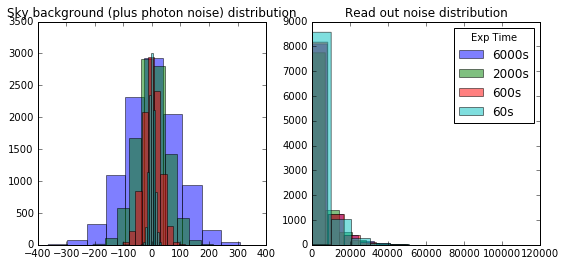

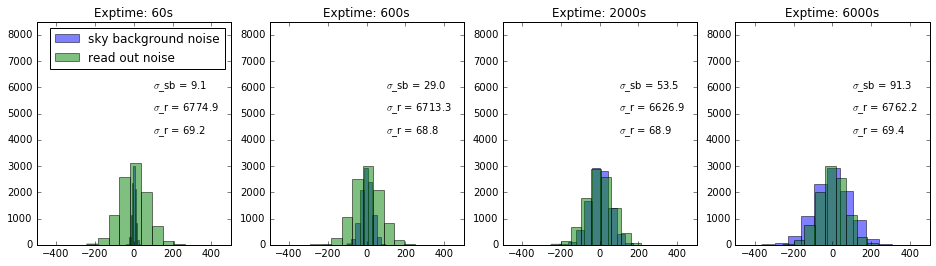

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
ax1.set_title('Sky background (plus photon noise) distribution')
for data in [B_sky_array3,B_sky_array22,B_sky_array2,B_sky_array1]:
    ax1.hist(np.ravel(data),edgecolor='black', alpha = 0.5)

#fig = plt.figure(figsize=(6, 3.2))
#ax = fig.add_subplot(111)
ax2.set_title('Read out noise distribution')
for data,label in zip([R_squared_array3,R_squared_array22,R_squared_array2,R_squared_array1],\
                      ['6000s','2000s','600s','60s']):
    ax2.hist(np.ravel(data),edgecolor='black', alpha = 0.5,label=label)
ax2.legend(title='Exp Time')
    
fig2, (ax3, ax4,ax44,ax5) = plt.subplots(1, 4, figsize=(16, 4))
plthist(ax3,B_sky_array1,R_squared_array1,R_array1,title='Exptime: 60s',\
        label1='sky background noise',label3='read out noise',xlim=[-500,500])#,label3='read out noise')
ax3.legend()
plthist(ax4,B_sky_array2,R_squared_array2,R_array2,title='Exptime: 600s',xlim=[-500,500])
plthist(ax44,B_sky_array22,R_squared_array22,R_array22,title='Exptime: 2000s',xlim=[-500,500])
plthist(ax5,B_sky_array3,R_squared_array3,R_array3,title='Exptime: 6000s',xlim=[-500,500])

plt.show()

From the plots above, one can see that the readout noise dominates until exposure time of ~30 minutes, when the sky background has grown to a similar level.  From that time onwards, the sky background continues growing.

Let's plot the noise added data to see what it looks like.

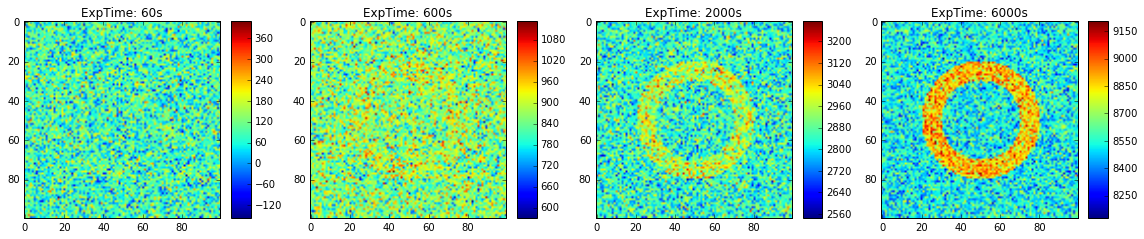

In [63]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4))
plotdata(noiseadded_signal1,ax=ax1)
ax1.set_title('ExpTime: 60s')
plotdata(noiseadded_signal2,ax=ax2)
ax2.set_title('ExpTime: 600s')
plotdata(noiseadded_signal22,ax=ax3)
ax3.set_title('ExpTime: 2000s')
plotdata(noiseadded_signal3,ax=ax4)
ax4.set_title('ExpTime: 6000s')
plt.tight_layout()

### Example 2:  No binning (resolution = 2.8), comparing results between old R and R = 0.001

VERBOSE: Using old cameras... (QE = 0.48, R = 10.)
Adding sky background noise and shot noise.
Adding read out noise to the signal.
VERBOSE:  At line 0 out of 100
VERBOSE:  At line 1 out of 100
VERBOSE:  At line 2 out of 100
VERBOSE:  At line 3 out of 100
VERBOSE:  At line 4 out of 100
VERBOSE:  At line 5 out of 100
VERBOSE:  At line 6 out of 100
VERBOSE:  At line 7 out of 100
VERBOSE:  At line 8 out of 100
VERBOSE:  At line 9 out of 100
VERBOSE:  At line 10 out of 100
VERBOSE:  At line 11 out of 100
VERBOSE:  At line 12 out of 100
VERBOSE:  At line 13 out of 100
VERBOSE:  At line 14 out of 100
VERBOSE:  At line 15 out of 100
VERBOSE:  At line 16 out of 100
VERBOSE:  At line 17 out of 100
VERBOSE:  At line 18 out of 100
VERBOSE:  At line 19 out of 100
VERBOSE:  At line 20 out of 100
VERBOSE:  At line 21 out of 100
VERBOSE:  At line 22 out of 100
VERBOSE:  At line 23 out of 100
VERBOSE:  At line 24 out of 100
VERBOSE:  At line 25 out of 100
VERBOSE:  At line 26 out of 100
VERBOSE:  At l

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:31: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Adding dark current to the signal.
VERBOSE: Using old cameras... (QE = 0.48, R = 10.)
Adding sky background noise and shot noise.
Adding read out noise to the signal.
VERBOSE:  At line 0 out of 100
VERBOSE:  At line 1 out of 100
VERBOSE:  At line 2 out of 100
VERBOSE:  At line 3 out of 100
VERBOSE:  At line 4 out of 100
VERBOSE:  At line 5 out of 100
VERBOSE:  At line 6 out of 100
VERBOSE:  At line 7 out of 100
VERBOSE:  At line 8 out of 100
VERBOSE:  At line 9 out of 100
VERBOSE:  At line 10 out of 100
VERBOSE:  At line 11 out of 100
VERBOSE:  At line 12 out of 100
VERBOSE:  At line 13 out of 100
VERBOSE:  At line 14 out of 100
VERBOSE:  At line 15 out of 100
VERBOSE:  At line 16 out of 100
VERBOSE:  At line 17 out of 100
VERBOSE:  At line 18 out of 100
VERBOSE:  At line 19 out of 100
VERBOSE:  At line 20 out of 100
VERBOSE:  At line 21 out of 100
VERBOSE:  At line 22 out of 100
VERBOSE:  At line 23 out of 100
VERBOSE:  At line 24 out of 100
VERBOSE:  At line 25 out of 100
VERBOSE:  A

VERBOSE:  At line 58 out of 100
VERBOSE:  At line 59 out of 100
VERBOSE:  At line 60 out of 100
VERBOSE:  At line 61 out of 100
VERBOSE:  At line 62 out of 100
VERBOSE:  At line 63 out of 100
VERBOSE:  At line 64 out of 100
VERBOSE:  At line 65 out of 100
VERBOSE:  At line 66 out of 100
VERBOSE:  At line 67 out of 100
VERBOSE:  At line 68 out of 100
VERBOSE:  At line 69 out of 100
VERBOSE:  At line 70 out of 100
VERBOSE:  At line 71 out of 100
VERBOSE:  At line 72 out of 100
VERBOSE:  At line 73 out of 100
VERBOSE:  At line 74 out of 100
VERBOSE:  At line 75 out of 100
VERBOSE:  At line 76 out of 100
VERBOSE:  At line 77 out of 100
VERBOSE:  At line 78 out of 100
VERBOSE:  At line 79 out of 100
VERBOSE:  At line 80 out of 100
VERBOSE:  At line 81 out of 100
VERBOSE:  At line 82 out of 100
VERBOSE:  At line 83 out of 100
VERBOSE:  At line 84 out of 100
VERBOSE:  At line 85 out of 100
VERBOSE:  At line 86 out of 100
VERBOSE:  At line 87 out of 100
VERBOSE:  At line 88 out of 100
VERBOSE:

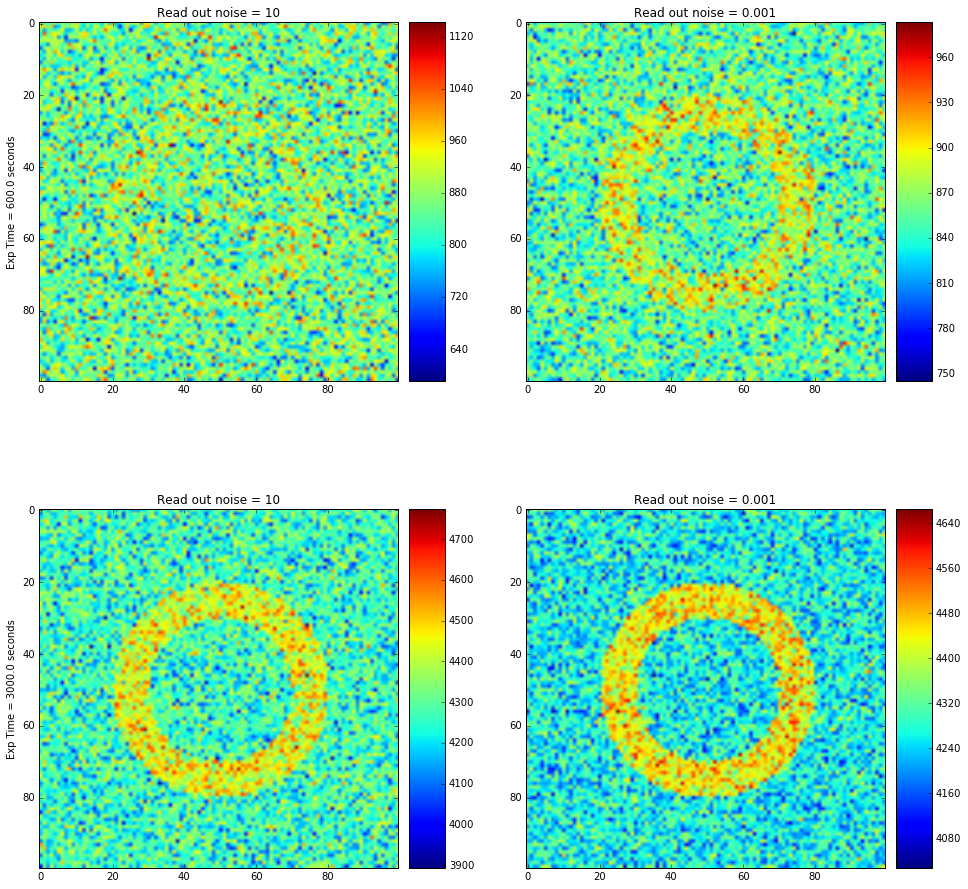

In [68]:
data = pretenddata; resolution = 2.8; exptime1 = 600.; debugging=False
noiseadded_signal1,B_sky_array1,R_array1 = addnoise(data,resolution,log=False,\
                                                    exptime=exptime1, expnum=1, debugging=False)
R_squared_array1 = R_array1**2

noiseadded_signal2,B_sky_array2,R_array2 = addnoise(data,resolution,log=False,R=0.001,\
                                                    exptime=exptime1, expnum=1, debugging=False)
R_squared_array2 = R_array1**2

exptime2 = 3000.

noiseadded_signal3,B_sky_array3,R_array3 = addnoise(data,resolution,log=False,\
                                                    exptime=exptime2, expnum=1, debugging=False)
R_squared_array3 = R_array3**2

noiseadded_signal4,B_sky_array4,R_array4 = addnoise(data,resolution,log=False,R=0.001,\
                                                    exptime=exptime2, expnum=1, debugging=False)
R_squared_array4 = R_array4**2

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 16))
plotdata(noiseadded_signal1,ax=ax1)#,bounds=[40,130])#,bounds=[700,1000])
plotdata(noiseadded_signal2,ax=ax2)#,bounds=[40,130])#,bounds=[700,1000])
plotdata(noiseadded_signal3,ax=ax3)#,bounds=[40000,45000])
plotdata(noiseadded_signal4,ax=ax4)#,bounds=[40000,45000])
ax1.set_title('Read out noise = 10')
ax1.set_ylabel('Exp Time = %s seconds'%exptime1)
ax2.set_title('Read out noise = 0.001')
ax3.set_title('Read out noise = 10')
ax3.set_ylabel('Exp Time = %s seconds'%exptime2)
ax4.set_title('Read out noise = 0.001')

### Example 3: Binning (resolution = 100 arcsec)

In [71]:
data = pretenddata; exptime = 1.; debugging=True

resolution_nobin = 2.8;
noiseadded_signal_nobin,B_sky_array_nobin,R_array_nobin = addnoise(data,resolution_nobin,log=False,\
                                                                    exptime=exptime, expnum=1, debugging=True)
R_squared_array_nobin = R_array_nobin**2

resolution_bin = 100.;
noiseadded_signal_bin,B_sky_array_bin,R_array_bin = addnoise(data,resolution_bin,log=False,\
                                                            exptime=exptime, expnum=1, debugging=True)
R_squared_array_bin = R_array_bin**2


DEBUGGING: the binpix_size (resolution) is 2.8
DEBUGGING: the pixel size (inherent) is 2.8
VERBOSE: Using old cameras... (QE = 0.48, R = 10.)
DEBUGGING: R is : 10.0
DEBUGGING: the number of pixels is 1.0
DEBUGGING: the shape of the input data is:
(100, 100)
DEBUGGING: the total object signal [electrons] detected ranges from: 0.0 to 0.0579599947142
DEBUGGING: the shape of the detsignal is:
(100, 100)
Adding sky background noise and shot noise.
DEBUGGING: the background in the bandwidth is: 0.560633
DEBUGGING: the background signal, B_sky [ph/s (in a pixel)], is: 1.3824775167
DEBUGGING: the shape of B_sky_array is: 
(100, 100)
DEBUGGING: the mean total background signal, B_sky_total [electrons], is: 1.3824775167
DEBUGGING: the total background noisy signal [electrons] ranges from: -5.09393320648 to 4.32087383563
Adding read out noise to the signal.
DEBUGGING: The number of exposures is: 1
DEBUGGING: Drawing 48.0 values (numpixel=1 * numexp=1.0 * numlens=48) per binned pixel and summing t

/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:31: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


VERBOSE:  At line 82 out of 100
VERBOSE:  At line 83 out of 100
VERBOSE:  At line 84 out of 100
VERBOSE:  At line 85 out of 100
VERBOSE:  At line 86 out of 100
VERBOSE:  At line 87 out of 100
VERBOSE:  At line 88 out of 100
VERBOSE:  At line 89 out of 100
VERBOSE:  At line 90 out of 100
VERBOSE:  At line 91 out of 100
VERBOSE:  At line 92 out of 100
VERBOSE:  At line 93 out of 100
VERBOSE:  At line 94 out of 100
VERBOSE:  At line 95 out of 100
VERBOSE:  At line 96 out of 100
VERBOSE:  At line 97 out of 100
VERBOSE:  At line 98 out of 100
VERBOSE:  At line 99 out of 100
DEBUGGING: Standard deviation of R array: 69.5736746897 
DEBUGGING: the R_squared value is: 100.0, so in 1 exposures [per pixel], will have R_squared of: 100.0
DEBUGGING: the total R_squared value [electrons] multiplying by numpix read out is: 100.0
DEBUGGING: the max and min R_squared values are: 64866.7367717 and 2.81934608417e-05
DEBUGGING: the max and min R values are: 250.048024794 and -254.689490894
Adding dark cur

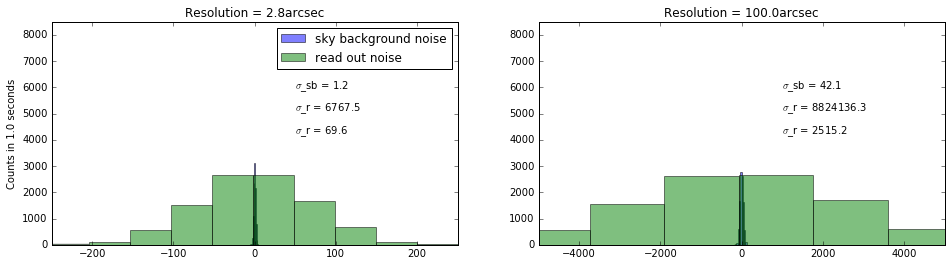

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
plthist(ax1,B_sky_array_nobin,R_squared_array_nobin,R_array_nobin,title='Resolution = %sarcsec'%resolution_nobin,\
        label1='sky background noise',label2='read out noise squared',label3='read out noise',xlim=[-250, 250])
ax1.legend()
plthist(ax2,B_sky_array_bin,R_squared_array_bin,R_array_bin,title='Resolution = %sarcsec'%resolution_bin,\
        xlim=[-5000, 5000])
ax1.set_ylabel('Counts in %s seconds'%exptime)
plt.show()

The number of pixels that are binned over is 1276.  We can check that the standard deviations are increasing correctly:

$\sigma_{bin}$ = $\sqrt(numpix) \times \sigma$<br>

In [74]:
numpix = 1276
print "Binned over %s pixels, the new stddev of readout noise should be about %s" % (numpix,(np.sqrt(numpix)*69.6))
print "Binned over %s pixels, the new stddev of sky background noise should be about %s" % (numpix,(np.sqrt(numpix)*1.2))

Binned over 1276 pixels, the new stddev of readout noise should be about 2486.19149705
Binned over 1276 pixels, the new stddev of sky background noise should be about 42.8653706388
